<a href="https://colab.research.google.com/github/aalr007/MAAM/blob/main/A3a_DL_TC3007B_embeddings_hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/aalr007/MAAM/blob/main/A3a_DL_TC3007B_embeddings_hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> ***Métodos Avanzados de Aprendizaje Máquina*** </center>
## <center> ***Equipo 38*** </center>
## <center> ***Activity 3a*** </center>
### Profesor: Dr José Antonio Cantoral Cevallos
### Alumnos:
* Luis Alfredo Negron Naldos A01793865
* Javier Muñoz Barrios A01794423
* Aurelio Antonio Lozano Rábago A01081266

#### <p style='text-align: right;'> Noviembre del 2023 </p>

## TC 5033
### Word Embeddings

<br>

#### Activity 3a: Exploring Word Embeddings with GloVe and Numpy
<br>

- Objective:
    - To understand the concept of word embeddings and their significance in Natural Language Processing.
    - To learn how to manipulate and visualize high-dimensional data using dimensionality reduction techniques like PCA and t-SNE.
    - To gain hands-on experience in implementing word similarity and analogies using GloVe embeddings and Numpy.
    
<br>

- Instructions:
    - Download GloVe pre-trained vectors from the provided link in Canvas, the official public project:
    Jeffrey Pennington, Richard Socher, and Christopher D. Manning. 2014. GloVe: Global Vectors for Word Representation
    https://nlp.stanford.edu/data/glove.6B.zip

    - Create a dictorionay of the embeddings so that you carry out fast look ups. Save that dictionary e.g. as a serialized file for faster loading in future uses.
    
    - PCA and t-SNE Visualization: After loading the GloVe embeddings, use Numpy and Sklearn to perform PCA and t-SNE to reduce the dimensionality of the embeddings and visualize them in a 2D or 3D space.

    - Word Similarity: Implement a function that takes a word as input and returns the 'n' most similar words based on their embeddings. You should use Numpy to implement this function, using libraries that already implement this function (e.g. Gensim) will result in zero points.

    - Word Analogies: Implement a function to solve analogies between words. For example, "man is to king as woman is to ____". You should use Numpy to implement this function, using libraries that already implement this function (e.g. Gensim) will result in zero points.

    - Submission: This activity is to be submitted in teams of 3 or 4. Only one person should submit the final work, with the full names of all team members included in a markdown cell at the beginning of the notebook.
    
<br>

- Evaluation Criteria:

    - Code Quality (40%): Your code should be well-organized, clearly commented, and easy to follow. Use also markdown cells for clarity.
    
   - Functionality (60%): All functions should work as intended, without errors.
       - Visualization of PCA and t-SNE (10% each for a total of 20%)
       - Similarity function (20%)
       - Analogy function (20%)
|



#### Import libraries

In [ ]:
# Import libraries
import torch
import torch.nn.functional as F
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm
import pickle
plt.style.use('ggplot')
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits

#### Load file

In [ ]:
# PATH = '/media/pepe/DataUbuntu/Databases/glove_embeddings/glove.6B.200d.txt'
PATH = 'glove.6B/glove.6B.200d.txt'
emb_dim = 200

Following function will create the dictionary with embeddings

In [ ]:
# Create dictionary with embeddings
def create_emb_dictionary(path):
    # Crea un diccionario para almacenar las incrustaciones
    emb_dict = {}

    # abrimos la base de datos
    with open(path, 'r', encoding='utf-8') as file:
        for line in file:
            parts = line.strip().split(' ')  # Supongamos que las incrustaciones están separadas por espacios.
            word = parts[0]  # La primera parte es la palabra o elemento.
            embedding = [float(val) for val in parts[1:]]  # El resto son los valores.
            emb_dict[word] = embedding

        # Retorna el diccionario creado
    return emb_dict

Call the function to create the dictionary of the embeddings

In [ ]:
# create dictionary
embeddings_dict = create_emb_dictionary(PATH)

Save the file for further faster use

In [ ]:
# Serialize
# Guarda el diccionario en un archivo serializado para cargarlo rápidamente en el futuro.
with open('embeddings_dict_200D.pkl', 'wb') as output_file:
  pickle.dump(embeddings_dict, output_file)

# Deserialize
# with open('embeddings_dict_200D.pkl', 'rb') as f:
#     embeddings_dict = pickle.load(f)

#### See some embeddings

In [ ]:
# muestra los primeros embeddings
def show_n_first_words(path, n_words):
        with open(path, 'r') as f:   #abrimos el path
            for i, line in enumerate(f):
                print(line.split(), len(line.split()[1:]))
                if i>=n_words: break  #aqui nos salimos del ciclo si ya llegamos al numero de n_words (embeddings a imprimir)

In [ ]:
show_n_first_words(PATH, 5)

['the', '-0.071549', '0.093459', '0.023738', '-0.090339', '0.056123', '0.32547', '-0.39796', '-0.092139', '0.061181', '-0.1895', '0.13061', '0.14349', '0.011479', '0.38158', '0.5403', '-0.14088', '0.24315', '0.23036', '-0.55339', '0.048154', '0.45662', '3.2338', '0.020199', '0.049019', '-0.014132', '0.076017', '-0.11527', '0.2006', '-0.077657', '0.24328', '0.16368', '-0.34118', '-0.06607', '0.10152', '0.038232', '-0.17668', '-0.88153', '-0.33895', '-0.035481', '-0.55095', '-0.016899', '-0.43982', '0.039004', '0.40447', '-0.2588', '0.64594', '0.26641', '0.28009', '-0.024625', '0.63302', '-0.317', '0.10271', '0.30886', '0.097792', '-0.38227', '0.086552', '0.047075', '0.23511', '-0.32127', '-0.28538', '0.1667', '-0.0049707', '-0.62714', '-0.24904', '0.29713', '0.14379', '-0.12325', '-0.058178', '-0.001029', '-0.082126', '0.36935', '-0.00058442', '0.34286', '0.28426', '-0.068599', '0.65747', '-0.029087', '0.16184', '0.073672', '-0.30343', '0.095733', '-0.5286', '-0.22898', '0.064079', '0.0

### Plot some embeddings

In [ ]:
#
def plot_embeddings(emb_path, words2show,emb_dim, embeddings_dict, func):
    # Cargar el diccionario de incrustaciones desde el archivo serializado
    with open(emb_path, 'rb') as input_file:      #emb_path tiene el serializado donde estan los embeddings
        embeddings_dict = pickle.load(input_file)

    # Obtener las palabras y las incrustaciones en una matriz NumPy
    embeddings_matrix = np.array([embeddings_dict[word] for word in words2show])

    if func == 'PCA':
        # Aplicar PCA para reducir las dimensiones
        pca = PCA(n_components=emb_dim)
        embeddings = pca.fit_transform(embeddings_matrix)
    elif func == 'TSNE':
        # Aplicar t-SNE para reducir las dimensiones
        tsne = TSNE(n_components=emb_dim)
        embeddings = tsne.fit_transform(embeddings_matrix)
    else: #ponemos una condicion para mostrar que no enviamos bien el parametro para reducir dimensiones
        raise ValueError("Func debe ser 'PCA' o 'TSNE'")

    num_elements = len(words2show)    #obtemos el numero de elementos a mostrar

    plt.figure(figsize=(13, 10))      #tamano de la figura (eje x, eje y)
    sns.set()

    x = embeddings[:num_elements, 0]  # Usa solo los primeros 'num_elements'
    y = embeddings[:num_elements, 1]

    # Crea un scatter plot
    plt.scatter(x, y, alpha=0.5)

    # Etiqueta cada punto con la palabra correspondiente
    for i, word in enumerate(words2show):
        plt.annotate(word, (x[i], y[i]), alpha=0.7)

    plt.show()

Following list is the one to graph

In [ ]:
#embeddings a mostrar en las graficas, se espera que se agrupen como estan en cada renglon
words= ['burger', 'tortilla', 'bread', 'pizza', 'beef', 'steak', 'fries', 'chips',
            'argentina', 'mexico', 'spain', 'usa', 'france', 'italy', 'greece', 'china',
            'water', 'beer', 'tequila', 'wine', 'whisky', 'brandy', 'vodka', 'coffee', 'tea',
            'apple', 'banana', 'orange', 'lemon', 'grapefruit', 'grape', 'strawberry', 'raspberry',
            'school', 'work', 'university', 'highschool']

Grapgh with PCA

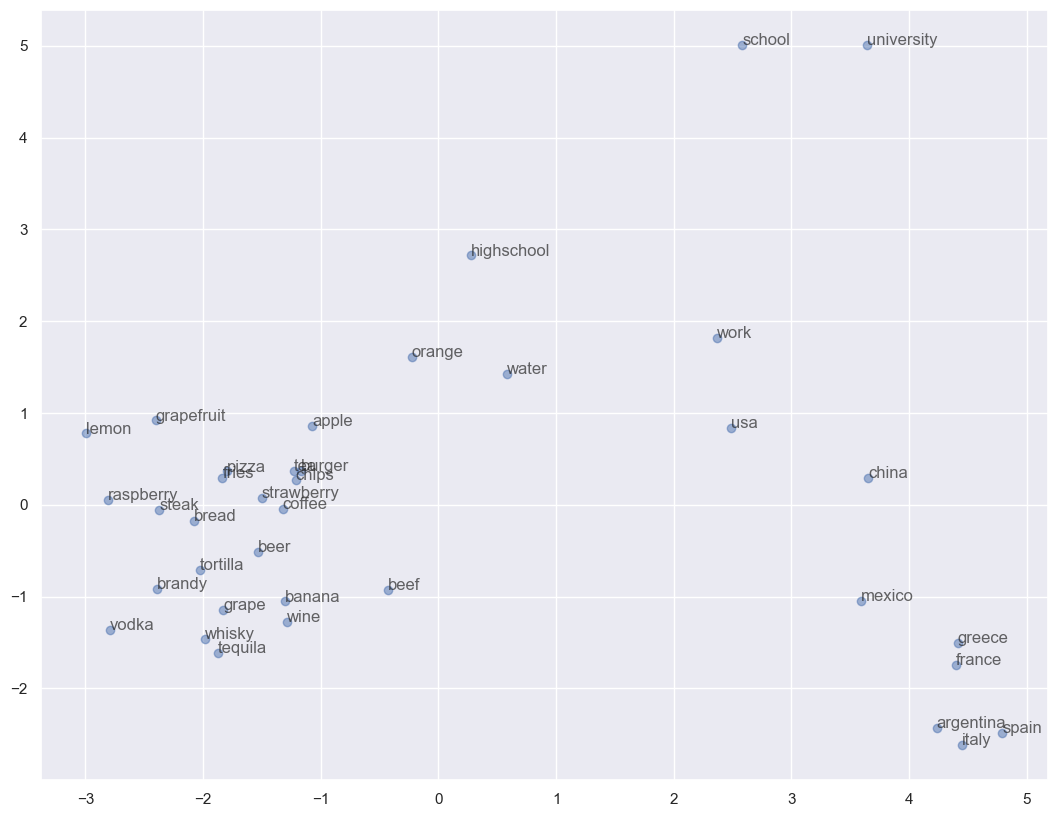

In [ ]:
#
plot_embeddings("embeddings_dict_200D.pkl", words, 2, embeddings_dict, "PCA")

Graph with TSNE

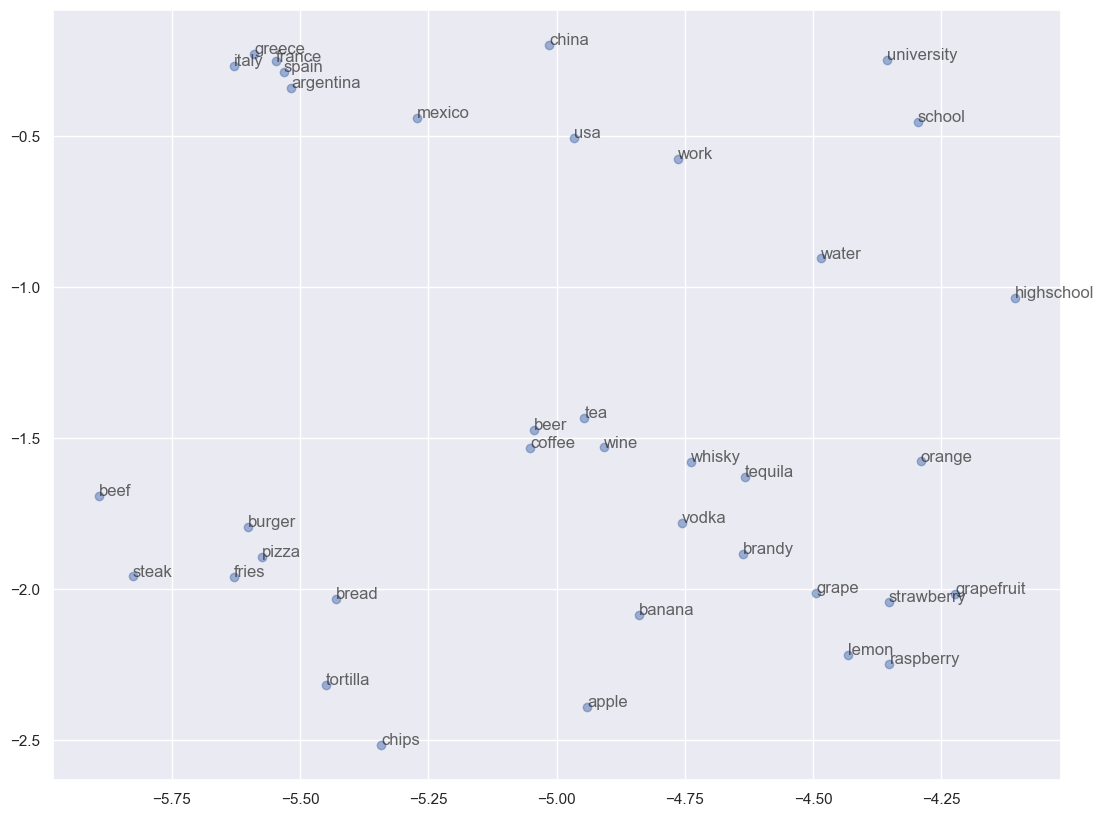

In [ ]:
# t-SNE dimensionality reduction for visualization
#mandamos llamar la misma funcion de graficar, pero ahora con TSNE
embeddings = plot_embeddings("embeddings_dict_200D.pkl", words, 2, embeddings_dict, "TSNE")

### Let us compute analogies

Analogy function, it creates the target vector by substracting the first 2 words and adding the third one, the minimum distance of a vector in the dictionary to this new vector would be the best analogy.

To calculate the minimum distance between a target vector and the subtraction of vectors is a way to perform word analogies in an embedding space. This is based on the concept that the direction in which the vector "man" must move to reach "woman" is the same direction in which the vector "king" must move to reach "queen."

In [ ]:
# analogy
#funcion para obtener la analogia
def analogy(word1, word2, word3, embeddings_dict):
    word1, word2, word3 = word1.lower(), word2.lower(), word3.lower()

    # Obtén los vectores de incrustación para las palabras y conviértelos a vectores NumPy
    vec_a, vec_b, vec_c = np.array(embeddings_dict[word1]), np.array(embeddings_dict[word2]), np.array(embeddings_dict[word3])

    # Calcula el vector objetivo como: vec_b - vec_a + vec_c
    vec_target = vec_b - vec_a + vec_c

    # Encuentra la palabra más similar al vector objetivo
    min_dist = float("inf")  #creamos una variable inicializada con valor positivo infinito
    best_word = None  #creamos una variable inicializada con "null"

    for word, vec in embeddings_dict.items():     #iteramos en el diccionario, word para la clave y vec con el valor del vector
        if word not in [word1, word2, word3]:     #checamos si la palabra del diccionario NO es word1, 2 o 3 pra calcular la distancia de ese vector al target
            dist = np.linalg.norm(vec - vec_target) #guardamos la distancia
            if dist < min_dist:                   #checamos si la distancia es la menor a alguna que tenemos
                min_dist = dist                   #si es la menor, la guardamos.
                best_word = word                  #almacenamos la mejor palabra en best_word

    return best_word


Test the analogy

In [ ]:
analogy('boy', 'son', 'girl', embeddings_dict)  #ponemos a prueba con nino es a hijo como nina es a... (esperemos que regrese hija: daughter)

'daughter'

Now lets fing the most similar words

cosine similarity is calculated using the formula for the dot product of two vectors divided by the product of their norms (lengths). Here is the formula for calculating cosine similarity between two vectors A and B:

Cosine Similarity = (A · B) / (||A|| * ||B||)

Where:

(A · B) represents the dot product of vectors A and B.
||A|| represents the norm (length) of vector A.
||B|| represents the norm (length) of vector B

In [ ]:
def find_most_similar(word, embeddings_dict, top_n=10):
    if word not in embeddings_dict:
        return []  # La palabra no está en el diccionario de incrustaciones

    # Obtén el vector de incrustación de la palabra de entrada
    word_vector = embeddings_dict[word]

    # Calcula la similitud coseno entre el vector de la palabra de entrada y todos los demás vectores
    similarities = {}
    for other_word, other_vector in embeddings_dict.items():        #iteramos en el diccionario, other_word para la clave y other_vector con el valor del vector
        if other_word != word:                                      #si la palabra es diferente a la palabra que queremos encontrar la similiud, entonces calculamos la distancia
            similarity = np.dot(word_vector, other_vector) / (np.linalg.norm(word_vector) * np.linalg.norm(other_vector))
            similarities[other_word] = similarity

    # Ordena las palabras por similitud coseno y toma las "top_n" más similares
    most_similar = sorted(similarities.items(), key=lambda x: x[1], reverse=True)[:top_n]

    return most_similar

In [ ]:
most_similar = find_most_similar('book', embeddings_dict)

In [ ]:
for i, w in enumerate(most_similar, 1):
    print(f'{i} ---> {w[0]}')

1 ---> books
2 ---> author
3 ---> novel
4 ---> published
5 ---> memoir
6 ---> wrote
7 ---> written
8 ---> essay
9 ---> biography
10 ---> autobiography


Extra activity
We check how the similarities would work using just the Euclidean Distance (similar on what we did for the analogy)
The results are not good. Cosine similarity generally works better for word embeddings because it takes into account the direction of vectors and not just the magnitude distance

In [ ]:
def find_most_similar_Bydist(word, embeddings_dict, top_n=10):
    if word not in embeddings_dict:
        return []  # La palabra no está en el diccionario de incrustaciones

    # Obtén el vector de incrustación de la palabra de entrada
    word_vector = embeddings_dict[word]

    # Calcula la similitud coseno entre el vector de la palabra de entrada y todos los demás vectores
    similarities = {}
    for other_word, other_vector in embeddings_dict.items():        #iteramos en el diccionario, other_word para la clave y other_vector con el valor del vector
        if other_word != word:                                      #si la palabra es diferente a la palabra que queremos encontrar la similiud, entonces calculamos la distancia
            # Convierte las listas en vectores NumPy antes de calcular la distancia
            other_vector = np.array(other_vector)
            word_vector = np.array(word_vector)
            similarity = np.linalg.norm(other_vector - word_vector) #guardamos la distancia
            similarities[other_word] = similarity

    # Ordena las palabras por similitud coseno y toma las "top_n" más similares
    most_similar = sorted(similarities.items(), key=lambda x: x[1], reverse=True)[:top_n]

    return most_similar

In [ ]:
most_similarbyDist = find_most_similar_Bydist('book', embeddings_dict)

In [ ]:
for i, w in enumerate(most_similarbyDist, 1):
    print(f'{i} ---> {w[0]}')

1 ---> republish
2 ---> non-families
3 ---> nonsubscribers
4 ---> nzse40
5 ---> 78.19
6 ---> eighteens
7 ---> 100-share
8 ---> reduced-price
9 ---> icasualties.org
10 ---> stoxx
